In [27]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:95% !important; }div.output_wrapper .output { padding-left: 14px; }</style>"))

In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import re
import os

In [29]:
bmw_data = pd.read_csv("agrk/bmw_data_agrk.csv")

In [133]:
cd agrk

C:\Users\Q514216\Desktop\jupyter\agrk


In [30]:
bmw_data.head()

,Unnamed: 0,van_17,READOUT_ID,measurement_time,ABGLEICH_LESEN_WERT,ABGLEICH_LESEN_WERT_CSIST_KF48,ABGLEICH_LESEN_WERT_CSSOLL_KF48,ABGLEICH_VERSTELLEN_WERT1,ABGLEICH_VERSTELLEN_WERT2,ABGLEICH_VERSTELLEN_WERT3,...,STAT_ZYKLENZAHL_3_WERT,STAT_ZYKLENZAHL_4_WERT,STAT_ZYKLENZAHL_5_WERT,TREIBSTOFFQUALITAET_EOM1_SPEZIELL_WERT,TREIBSTOFFQUALITAET_EOM2_SPEZIELL_WERT,TREIBSTOFFQUALITAET_EOM_NORMAL_WERT,ZIEL_MM_WERT,ZIEL_YY_WERT,ZIF_PROGRAMMSTAND,ZIF_STATUS
0,0,AAI+/jzbx2RvnRDt0IMZt/0h/ooIy+1rCz/4eF0oHAzH4f...,AAJ4dITGaqxD3wjiqLRr9GE3WLl3SqQHHD7a0YSUJ0LM+8...,2020-03-06 11:23:09,0.00,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,3.0,0.0,255.0,255.0
1,1,AAI+5XSU5moSJMYRALKiI5GaVGRGn65Q5fFIuz5DVTTEF3...,AAKJukTjnaKUvkG8LcPObf3xIbLKY4bPd1d9I+CV+bNNOM...,2020-07-08 13:54:00,2.00,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,6.0,22.0,255.0,255.0
2,2,AAI+7PDowNP6n2JQRYpX+6Kms5m5ZvUnLO2tivs8rHOdeR...,AAI1uVrcTdOtyQz8KDuSoaUe46wzzcPvZVwcZ7de4DqzZf...,2020-02-05 11:11:48,0.00,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,255.0,255.0
3,3,AAI+8cjl6GgVL8BDdfxH2UqBWUgSROwCNKjVYws+FHuJdG...,AAIG6vT6ti2GOXRI+zY9soBFKIo4VfJ6rIYjsteOq1C8sy...,2020-02-11 08:17:23,1579.38,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,2.0,0.0,255.0,255.0
4,4,AAI+AiiNZ4jffEvtGktIEVtvOnqoW551qh6dk0auipoJZo...,AAIDFkT2y/ksiL9PTe7VtFrT+UPFwndaA8MqcFkyEmkjqP...,2020-10-07 14:30:04,0.00,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,255.0,255.0


In [31]:
bmw_data["year"] =  bmw_data["measurement_time"].apply(lambda x: int(re.search("^\d{4}", x).group()))

In [32]:
bmw_data["hour"] =  bmw_data["measurement_time"].apply(lambda x: int(re.search("\s[0-9]{2}", x).group()))

In [33]:
def create_daytime_cats(x):
    x = int(re.search("\s[0-9]{2}", x).group())
    if x >= 6 and x < 12 :
        return "morning"
    if x >= 12 and x < 15 :
        return "afternoon"
    if x >= 15 and x < 20 :
        return "evening"
    else:
        return "night"

In [34]:
bmw_data["time_of_the_day"] = bmw_data["measurement_time"].apply(lambda x: create_daytime_cats(x))

In [35]:
def month_split(txt):
    month_res = re.findall("\-\d{2}", txt)[1] # delete the hyphen
    #int(interm_result)
    month_res = int(re.search("\d{2}", month_res).group())
    return month_res
# month and day
# actually i don't think day is really needed. unless you wanted to implement some checking for holidays
bmw_data["month"] = bmw_data["measurement_time"].apply(lambda x: month_split(x))

In [36]:
bmw_data.shape

(9920, 3092)

In [37]:
bmw_data.describe()

,Unnamed: 0,ABGLEICH_LESEN_WERT,ABGLEICH_LESEN_WERT_CSIST_KF48,ABGLEICH_LESEN_WERT_CSSOLL_KF48,ABGLEICH_VERSTELLEN_WERT1,ABGLEICH_VERSTELLEN_WERT2,ABGLEICH_VERSTELLEN_WERT3,ABGLEICH_VERSTELLEN_WERT4,ANZAHL_CALID_CVN,ANZAHL_ZEICHEN_IMA_WERTE,...,TREIBSTOFFQUALITAET_EOM1_SPEZIELL_WERT,TREIBSTOFFQUALITAET_EOM2_SPEZIELL_WERT,TREIBSTOFFQUALITAET_EOM_NORMAL_WERT,ZIEL_MM_WERT,ZIEL_YY_WERT,ZIF_PROGRAMMSTAND,ZIF_STATUS,year,hour,month
count,9920.000000,5.297000e+03,5297.0,5297.0,5276.0,5276.0,5276.0,5276.0,5297.0,5297.0,...,5297.0,5297.0,5297.0,5297.000000,5297.000000,5296.0,5296.0,9920.000000,9920.000000,9920.000000
mean,4959.500000,1.445443e+05,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,0.0,0.0,3.058901,10.567491,255.0,255.0,2019.831956,12.387601,14.959980
std,2863.801669,5.762116e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.827315,10.651140,0.0,0.0,0.373925,3.757610,9.041274
min,0.000000,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,0.0,0.0,0.000000,0.000000,255.0,255.0,2019.000000,0.000000,1.000000
25%,2479.750000,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,0.0,0.0,0.000000,0.000000,255.0,255.0,2020.000000,9.000000,7.000000
50%,4959.500000,2.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,0.0,0.0,0.000000,0.000000,255.0,255.0,2020.000000,12.000000,14.000000
75%,7439.250000,2.390000e+03,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,0.0,0.0,6.000000,21.000000,255.0,255.0,2020.000000,15.000000,23.000000
max,9919.000000,8.684414e+06,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,0.0,0.0,12.000000,22.000000,255.0,255.0,2020.000000,23.000000,31.000000


In [7]:
bmw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Columns: 3088 entries, Unnamed: 0 to ZIF_STATUS
dtypes: float64(3084), int64(1), object(3)
memory usage: 233.7+ MB


In [15]:
print('Training data nulls')
print(bmw_data.isnull().sum().to_string()) # makes it print out ALL columns

Unnamed: 0                                                            0
van_17                                                                0
READOUT_ID                                                            0
measurement_time                                                      0
ABGLEICH_LESEN_WERT                                                4623
ABGLEICH_LESEN_WERT_CSIST_KF48                                     4623
ABGLEICH_LESEN_WERT_CSSOLL_KF48                                    4623
ABGLEICH_VERSTELLEN_WERT1                                          4644
ABGLEICH_VERSTELLEN_WERT2                                          4644
ABGLEICH_VERSTELLEN_WERT3                                          4644
ABGLEICH_VERSTELLEN_WERT4                                          4644
ANZAHL_CALID_CVN                                                   4623
ANZAHL_ZEICHEN_IMA_WERTE                                           4623
ANZ_CBS                                                         

In [164]:
# generating the target variable
broken_ids = ["AAIEmLr0am7kxAlYSa4vntqUtIg9JPNrKOIuf+mCCmOVjx7F6qd8aZx+zzpqS2A2NA/9hOnwObwMsu77F41hGWRy41lQeq0tXzappJqcQRiVF5EqhEs=",
"AAI2Z74rxtkLP5o00CwzgwNcHLaGDyezQdsH+ijASEpfoqWDNhVyP8CwSmoORAD7wCJq0JgvVQyx9YSQZk44+ypQV0Yep3SHzNGkJln15GvtVg2Pyeo=",
"AAJfGDbsHbOa+xv1Z3jXNGfGEaz2t2Lnk+VyHEg0PjQAeNf7yDVYa1BI18bkS8oylpUiSibFlKDteYZwrGnTWXVn5u1B8j48+I7JtmX6RC09ksh2BhE=",
"AAPHZ57CHD8A225IrwEbMTYR/Dgfvl/2WRlNm/kf/LTALquIE1ezobXVWwMixlAHa0uQFyd/gyph//K7T2lKRI3N7AAfBgo7zI+f+T7ZA3PYCsD3bjQ=",
"AAItevBAwpnXLdy28Qx70+IvUuXq4XVtBoIuo+2aorMPzHRXScg5bFJKuE2AT9ioqnvfrsKUcI2xgd+kqQkM0NqiIELgjYPj9P3HiehyWXWaClujRAo=",
"AAMnnp+UMV8KXp6pOVSs1D3SKuWa5CQvAEnGrhuGhOkUGMq8W7jzPHRsTqn29btXo5dYOMrruKwdYHEPTvFPROoYLA2iQSZGzOoMkIbVdBZgIkRK0C4=",
"AAI+AiiNZ4jffEvtGktIEVtvOnqoW551qh6dk0auipoJZojM30tq5yi0H2Sq0LcitihDHm1S4XWxjQoXB9R+Hf3uSsd/NNw6jkpQ2w7PaCKheo5OOHc=",
"AAJg+eJqtgfOHKVZ7xhbCIJckCdUTHAugxSduA0mKnxK+rbaEAeWpFDo/Z6W4T1aij6UOA2wIo8QVIXcuw6SGqm7xZUhqQciIcPwIT3um7wbLbDKIXc=",
"AAJvvsZ1uBtz3jlF7lACbhVOKP+cT6N3dPNiGdjgTbhInc/q36z6FTR0doJH/O+twqx0Z0h2I/Lg7ohNl0MBsgcVfQ80b9dF0muOEPw1l3qK8aIBJHk=",
"AAP6PQJO9jXUE031Pc8rGLNEYYpIvB9xEkhEffE6A5r2pNFv88rxe3jpH9JS7NAxlrj4T94heTxu0tYOQ05Zq8Tl8utc2NPZRU9pxqyglbIz1+7F5Gg=",
"AAPraYW1U9vIKJ15dBWOjlrmYDChbtSPIpTQjVbhFvLhvf1sSFyESBS6L4Uj/7ksY9WIS9X9VmV2DDZYaaxm97w+dTtxt+HfFy/hKvtDPWhjjWW47i4=",
"AALXYHouTyZn/CR5gi+Gah7UbgDSNOiOWHf9xj1DVaFSGeDhao0/0HpfLbGyzl9YGXPNIEC7w1zkGXaebQAoZCavelJIIDoyPZScS4eC4wok2/FFvRQ=",
"AAPU/E8lpCDp1iVm8kY2MhdCFvTHoW8g74rby2qI8taBaOU40MK7DdQgTTc7JUBUxuvGuAm+9j7wvvVWpjOW/tAN1+C5Wkd7d7hYQ3goDzSN3SYNBZU=",
"AAOaTqH7EQ44M78mTOHgEpo3pOTH2wKt6M34KXCQZGHhavk3d1ZeXjV1g7nDyYvQYZ0kIIo2j5uHn8rqfpWoI3k+ikXOQTAPwK7H+RGhLpSjyU+YJ/0=",
"AAOq3MqOEtxLbES68uXeqCPxbgBGuOAV2JgKadrsWZkp0dVJAWjZiM42gzL9hw+u2lEuj7zfWhMzfB2tpsZAN7kApIx06MmvQdG/ZSyi3RjqHdbZtlA=",
"AAKEle6czngEKH3T27WYC1/ljumLZhrS74Z0UocY2NH2LtoCtLGLxYDsLppZctL5Cq5qOYzGv1i4X1H3mF5V3wjWB4w/K6ms6JYMM9/A4xC2FWq6Ncc=",
"AAOW7M9fuCx6l572C4FxWRX3Zw74YdCoLlV3t+uakJ+DahMOJyRHLbtikacK/82GfY21nBCjk5FFZWuEQJPiYlxfJ3Ms9eWDx+772Glu4d2WdNi0iJ8=",
"AALwHJ487oY+EcQ1jC5sRNAoW1l+gDpkrxpDucPpTRQIwndp5M76XaWnH632j+E1QbYcaQDpLzJzhJ1jNvgbknq+bXCss2vW8kp4AgIfDewadjHEQZU=",
"AAKrZo+jmeYyDIEjwvpUJyLYVTc0xCj2TeHz4fKrFfwRisB3v59Z4n/em+Ru0Fj88vSdly7M2XCfFfzIlaxipteKTUEQw2ip+N+ywz/tl6frIvsbKeI=",
"AAJvTw0yUROovfsGIBZbchvSvVN+ec0yaklva4iANSjEmSFtybYzIru2Qk+bfbIDXiN1+KaLwVV2zWEFt5EngMCN2cPo8b+qluCFa+dCvnIYmbJLZTk=",
"AAMjBJa8JgReLjFH4iPQHtcGawa0LAfjworpGuDtesk37Ay9GtBtwiwhPN8Ua1Obup5m8PxiJ5Qws7bFOGaCSl1XrUfG9mypmwJkYYIT2KVTot+MPaM=",
"AAMJaia4QmA/50Xh25B/0tqNElgnC7rJloJWZCD87Vi6g2HycqYmlHQcWsjvoYI616jexLVt+6eZz0Vfk+P7PSiB3BcVCEZP5ntWcjWSNswlRWxYVqg=",
"AAOtZkZLhuDDyZqUrISnfxBjz7/4e/mpEZ/9Yj0ujFyO8y0BDTXjzgj9YsgW8e0itQA3TMtzIcPjZuMJBI/uHyWznZH8et7zeQxGySYMy9RGruAbt04=",
"AAPwPr9OZYTb74RP+aoNY8v3oUPhsYLeb5gw+dStNyg5aGC2CXc/LptW7I6kRVix6mtdwJq94DV/gWqslTIbgpBHsGKsMgJFMvPWwdEWdRqONEkmgX0=",
"AAOcdkNwZiPzi5Uz3vG2VyJGL3GAysKaq+T4lSpT8r08XcR9OPC5IQiw8rUlk6d39fz8dhReGFtmmP5Uk87p+54Xz1YxZ5unofYG+WcJMuBc49gClXA=",
"AAJ1R17ZZDY3jmKXjcVTSEO2nQ2PFxB4gzv0xL8vLoGXH5ApnOqmrx5y1NlFrhY/vJwIWZe+wyV/xl1fXjO1C8LQG9shaYzxoJBXrX5+kAvHEY37ERU=",
"AAKRiJIIyXLSmDcr6gjbCExqe+sa4+y94LQMEIy6JKTUgJElGa5SEczSp3xt7ySqho6jc9+3ETcjLzYkhiLpXabn6yNOlnLBBjIq6KBY/XDfrvLn5Zk=",
"AAOu2LLh1/FCOF9cdaPqnpOP0U+nA2oOKhhqajTL+MkzXdkcHTz0mkAEEXwrxCQHmrl716Y16UieNz2dg0X1NhRxyHSdOBG2QtG9E96Xg5f3KAQFKmY=",
"AAIKZzb2rJ6+MKrRbd9nWp+9LTg7pjzB7DiVkoHysM7SwwLC6HYBMBkJiXA1Ix8M3wi4ICfRWtItAEGZ8/IAZ+O6ksgozg8k0K4cQzWj30aLspDuuEM=",
"AALvHxmQsPuNXB8BkAqghSvieu2fMRrYnuv1tFBUBGAr73OI/YZnxLhwu/PI9tP+8D6aKDxmE70+nmd0M5626k19pXlQZwpk04OopQNX7STQ8i3iQJc="]

In [166]:
# imputed all null values with column means
bmw_data_no_na = bmw_data.fillna(bmw_data.median())

# generating the target variable
def broken_ids_check(data):
    if data in broken_ids:
        return 1
    else:
        return 0

bmw_data_no_na["target"] = bmw_data_no_na.van_17.apply(lambda x: broken_ids_check(x))

# checks
# np.where(bmw_data.van_17 == broken_ids[1])
# bmw_data.iloc[104, :].target

# drop object columns:
bmw_data_no_na.drop(["van_17", "READOUT_ID", "measurement_time"], axis=1, inplace=True)
bmw_data_ready = pd.get_dummies(bmw_data_no_na, prefix = "time_of_the_day") # culprit

In [39]:
# normalize the data
# that was testing, don't use
# I REPEAT, DO NOT USE!!!!!!!
from sklearn import preprocessing
x = bmw_data_ready.values #returns a numpy array
x_scaled = preprocessing.normalize(x, norm = "l2")
#x_scaled = min_max_scaler.fit_transform(x)
bmw_data_ready_1 = pd.DataFrame(x_scaled)
bmw_data_ready_1.columns = bmw_data_ready.columns
# that doesn't result in normalization, half the columns get filled with nan's
#bmw_data_ready_1 = (bmw_data_ready - bmw_data_ready.mean()) / bmw_data_ready.std()

In [12]:
bmw_data_ready_1.head()

,Unnamed: 0,ABGLEICH_LESEN_WERT,ABGLEICH_LESEN_WERT_CSIST_KF48,ABGLEICH_LESEN_WERT_CSSOLL_KF48,ABGLEICH_VERSTELLEN_WERT1,ABGLEICH_VERSTELLEN_WERT2,ABGLEICH_VERSTELLEN_WERT3,ABGLEICH_VERSTELLEN_WERT4,ANZAHL_CALID_CVN,ANZAHL_ZEICHEN_IMA_WERTE,...,ZIEL_YY_WERT,ZIF_PROGRAMMSTAND,ZIF_STATUS,year,hour,month,time_of_the_day_afternoon,time_of_the_day_evening,time_of_the_day_morning,time_of_the_day_night
0,0.000000e+00,0.000000e+00,6.105984e-14,6.105984e-14,0.0,0.0,0.0,0.0,2.442394e-13,4.274189e-13,...,0.000000e+00,1.557026e-11,1.557026e-11,1.233409e-10,6.716583e-13,3.663590e-13,0.000000e+00,0.0,6.105984e-14,0.0
1,1.248059e-11,2.496118e-11,1.248059e-11,1.248059e-11,0.0,0.0,0.0,0.0,4.992235e-11,8.736411e-11,...,2.745729e-10,3.182550e-09,3.182550e-09,2.521079e-08,1.622476e-10,9.984470e-11,1.248059e-11,0.0,0.000000e+00,0.0
2,3.753239e-13,0.000000e+00,1.876620e-13,1.876620e-13,0.0,0.0,0.0,0.0,7.506478e-13,1.313634e-12,...,0.000000e+00,4.785380e-11,4.785380e-11,3.790771e-10,2.064281e-12,9.383098e-13,0.000000e+00,0.0,1.876620e-13,0.0
3,1.811420e-10,9.536400e-08,6.038065e-11,6.038065e-11,0.0,0.0,0.0,0.0,2.415226e-10,4.226646e-10,...,0.000000e+00,1.539707e-08,1.539707e-08,1.219689e-07,4.830452e-10,6.641872e-10,0.000000e+00,0.0,6.038065e-11,0.0
4,3.094984e-10,0.000000e+00,7.737459e-11,7.737459e-11,0.0,0.0,0.0,0.0,3.094984e-10,5.416221e-10,...,0.000000e+00,1.973052e-08,1.973052e-08,1.562967e-07,1.083244e-09,5.416221e-10,7.737459e-11,0.0,0.000000e+00,0.0


In [24]:
import sys
np.set_printoptions(threshold=sys.maxsize)

print(bmw_data.columns.values)

['Unnamed: 0' 'van_17' 'READOUT_ID' 'measurement_time'
 'ABGLEICH_LESEN_WERT' 'ABGLEICH_LESEN_WERT_CSIST_KF48'
 'ABGLEICH_LESEN_WERT_CSSOLL_KF48' 'ABGLEICH_VERSTELLEN_WERT1'
 'ABGLEICH_VERSTELLEN_WERT2' 'ABGLEICH_VERSTELLEN_WERT3'
 'ABGLEICH_VERSTELLEN_WERT4' 'ANZAHL_CALID_CVN' 'ANZAHL_ZEICHEN_IMA_WERTE'
 'ANZ_CBS' 'AVAI_CBS_WERT' 'AVAI_CBS_WERT_BRFL' 'AVAI_CBS_WERT_BR_H'
 'AVAI_CBS_WERT_BR_V' 'AVAI_CBS_WERT_EFK' 'AVAI_CBS_WERT_NOX'
 'AVAI_CBS_WERT_OEL' 'AVAI_CBS_WERT_SIC' 'AVAI_CBS_WERT_SIC_V'
 'AVAI_CBS_WERT_UEB' 'BPCOMP' 'BPCOND' 'BYTE1' 'BYTE2' 'BYTE3' 'CALID'
 'CALID_WERT_1' 'CALID_WERT_2' 'CBS_OEL_VF' 'COUNT_CBS_WERT_BRFL'
 'COUNT_CBS_WERT_BR_H' 'COUNT_CBS_WERT_BR_V' 'COUNT_CBS_WERT_EFK'
 'COUNT_CBS_WERT_NOX' 'COUNT_CBS_WERT_OEL' 'COUNT_CBS_WERT_SIC'
 'COUNT_CBS_WERT_SIC_V' 'COUNT_CBS_WERT_UEB' 'COU_RSTG_CBS_MESS_WERT'
 'CVN' 'CVN_WERT_1' 'CVN_WERT_2' 'ECU_ADR_WERT' 'EGRCOMP' 'EGRCOND'
 'EGSCOMP' 'EGSCOND' 'FRC_INTM_T_CBS_MESS' 'FRC_INTM_WAY_CBS_MESS'
 'FUELCOMP' 'FUELCOND' 'GESA

In [36]:
# data preprocessing, tensorflow expects tensors
# there is some categorical data, #dealwithit
# alsoalso, how come i looked up categorical data with a fct and found none.
# literally the very first column is categorical
#bmw_data_no_str = np.asarray(bmw_data_no_str).astype('float32')

In [167]:
# needed for testimg the autoencoder
from sklearn.model_selection import train_test_split
bmw_data_train, bmw_data_test = train_test_split(bmw_data_ready, test_size = 0.2)

In [168]:
# USE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(bmw_data_train)
bmw_data_train = scaler.fit_transform(bmw_data_train)
bmw_data_test = scaler.fit_transform(bmw_data_test)

In [54]:
bmw_data_train = pd.DataFrame(bmw_data_train)
bmw_data_train.columns = bmw_data_ready.columns
bmw_data_train

,Unnamed: 0,ABGLEICH_LESEN_WERT,ABGLEICH_LESEN_WERT_CSIST_KF48,ABGLEICH_LESEN_WERT_CSSOLL_KF48,ABGLEICH_VERSTELLEN_WERT1,ABGLEICH_VERSTELLEN_WERT2,ABGLEICH_VERSTELLEN_WERT3,ABGLEICH_VERSTELLEN_WERT4,ANZAHL_CALID_CVN,ANZAHL_ZEICHEN_IMA_WERTE,...,ZIEL_YY_WERT,ZIF_PROGRAMMSTAND,ZIF_STATUS,year,hour,month,time_of_the_day_afternoon,time_of_the_day_evening,time_of_the_day_morning,time_of_the_day_night
0,0.060591,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.954545,0.0,0.0,1.0,0.652174,0.066667,0.0,1.0,0.0,0.0
1,0.943946,3.100958e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.478261,0.600000,0.0,0.0,1.0,0.0
2,0.497228,2.302976e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.826087,0.066667,0.0,1.0,0.0,0.0
3,0.774876,5.411994e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.954545,0.0,0.0,1.0,0.608696,0.200000,1.0,0.0,0.0,0.0
4,0.742918,1.156094e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.739130,0.333333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7931,0.301442,2.302976e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.260870,0.633333,0.0,0.0,1.0,0.0
7932,0.766005,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.347826,0.266667,0.0,0.0,1.0,0.0
7933,0.297207,2.746299e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.304348,0.333333,0.0,0.0,1.0,0.0
7934,0.286521,2.302976e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.260870,0.133333,0.0,0.0,1.0,0.0


In [55]:
bmw_data_test = pd.DataFrame(bmw_data_test)
bmw_data_test.columns = bmw_data_ready.columns
bmw_data_test

,Unnamed: 0,ABGLEICH_LESEN_WERT,ABGLEICH_LESEN_WERT_CSIST_KF48,ABGLEICH_LESEN_WERT_CSSOLL_KF48,ABGLEICH_VERSTELLEN_WERT1,ABGLEICH_VERSTELLEN_WERT2,ABGLEICH_VERSTELLEN_WERT3,ABGLEICH_VERSTELLEN_WERT4,ANZAHL_CALID_CVN,ANZAHL_ZEICHEN_IMA_WERTE,...,ZIEL_YY_WERT,ZIF_PROGRAMMSTAND,ZIF_STATUS,year,hour,month,time_of_the_day_afternoon,time_of_the_day_evening,time_of_the_day_morning,time_of_the_day_night
0,0.534478,3.960966e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.521739,0.066667,1.0,0.0,0.0,0.0
1,0.464311,3.065211e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.434783,0.666667,0.0,0.0,1.0,0.0
2,0.452297,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.347826,0.066667,0.0,0.0,1.0,0.0
3,0.387784,4.072519e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.347826,0.200000,0.0,0.0,1.0,0.0
4,0.809894,3.329942e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.913043,0.500000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,0.154165,8.450893e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.695652,0.233333,0.0,1.0,0.0,0.0
1980,0.167390,3.329942e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.695652,0.900000,0.0,1.0,0.0,0.0
1981,0.697829,5.609320e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.391304,0.900000,0.0,0.0,1.0,0.0
1982,0.003433,3.329942e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.217391,0.466667,0.0,0.0,0.0,1.0


In [69]:
# the original model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

input_dim = bmw_data_train.shape[1]
encoding_dim = 500

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(encoding_dim, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='tanh')(decoder)
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [73]:
# the modified model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

input_dim = bmw_data_train.shape[1]
encoding_dim = 100

input_layer = Input(shape=(input_dim, ))
encoder = Dense(int(input_dim / 2), activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(input_dim / 4), activation=tf.keras.layers.LeakyReLU(alpha=0.01))(encoder)
encoder = Dense(int(input_dim / 8), activation="tanh")(encoder)
latent_space = Dense(encoding_dim, activation=tf.keras.layers.LeakyReLU(alpha=0.01),
                name = "latent-space")(encoder) # the bottleneck layer
decoder = Dense(int(input_dim / 8), activation="tanh")(latent_space)
decoder = Dense(int(input_dim / 4), activation=tf.keras.layers.LeakyReLU(alpha=0.01))(decoder)
decoder = Dense(int(input_dim / 2), activation='tanh')(decoder)
output_layer = Dense(input_dim, activation="tanh")(decoder)
autoencoder = Model(inputs=input_layer, outputs=output_layer)


In [96]:
autoencoder.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 3092)]            0         
_________________________________________________________________
dense_48 (Dense)             (None, 1546)              4781778   
_________________________________________________________________
dense_49 (Dense)             (None, 773)               1195831   
_________________________________________________________________
dense_50 (Dense)             (None, 386)               298764    
_________________________________________________________________
latent-space (Dense)         (None, 100)               38700     
_________________________________________________________________
dense_51 (Dense)             (None, 386)               38986     
_________________________________________________________________
dense_52 (Dense)             (None, 773)             

In [135]:
import tensorflow_addons as tfa
from tensorflow.keras import metrics

autoencoder.compile(optimizer='adam', 
                    loss = "mse",
                    metrics = [
                        metrics.RootMeanSquaredError(name='rms'),
                        metrics.MeanAbsoluteError(name='mae')
                        ]
                   )
checkpointer = ModelCheckpoint(filepath="model.z1",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(bmw_data_train, bmw_data_train,
                    epochs=20,
                    batch_size=32,
                    shuffle=True, 
                    validation_data=(bmw_data_test, bmw_data_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history
# better loss function

Epoch 1/20
248/248 [==============================] - 16s 64ms/step - loss: 0.0894 - rms: 0.1147 - mae: 0.0414 - val_loss: 0.0977 - val_rms: 0.1432 - val_mae: 0.0531
Epoch 2/20
248/248 [==============================] - 14s 58ms/step - loss: 0.0838 - rms: 0.1145 - mae: 0.0408 - val_loss: 0.0934 - val_rms: 0.1432 - val_mae: 0.0523
Epoch 3/20
248/248 [==============================] - 15s 60ms/step - loss: 0.0790 - rms: 0.1145 - mae: 0.0404 - val_loss: 0.0890 - val_rms: 0.1430 - val_mae: 0.0526
Epoch 4/20
248/248 [==============================] - 15s 59ms/step - loss: 0.0741 - rms: 0.1145 - mae: 0.0401 - val_loss: 0.0848 - val_rms: 0.1429 - val_mae: 0.0522
Epoch 5/20
248/248 [==============================] - 14s 58ms/step - loss: 0.0696 - rms: 0.1144 - mae: 0.0396 - val_loss: 0.0813 - val_rms: 0.1431 - val_mae: 0.0521
Epoch 6/20
248/248 [==============================] - 14s 58ms/step - loss: 0.0653 - rms: 0.1143 - mae: 0.0394 - val_loss: 0.0781 - val_rms: 0.1428 - val_mae: 0.0526
Epoc

In [136]:
encoder_model = Model(input_layer, latent_space)
embedded_data = encoder_model.predict(bmw_data_ready) # does the predict function shuffle the data?

In [170]:
print(bmw_data_ready.shape)
print(embedded_data.shape)

(9920, 3093)
(9920, 100)


In [171]:
labels = bmw_data_ready.target

In [175]:
import io
embedding = tf.Variable(tf.stack(embedded_data, axis=0), trainable=False, name='embedding')

out_v = io.open('latent_space.tsv', 'w', encoding='utf-8')
out_m = io.open('labels.tsv', 'w', encoding='utf-8')

for index, word in enumerate(labels): 
    vec = embedding[index-1] 
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(str(word) + "\n")

out_v.close()
out_m.close()

In [177]:
# ALL this sets up the embedding projector
import os
from tensorboard.plugins import projector

# Set up a logs directory, so Tensorboard knows where to look for files
log_dir = './logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)


# Create a checkpoint from embedding, the filename and key are
# name of the tensor.

checkpoint = tf.train.Checkpoint(embedding=embedding)
CHECKPOINT_FILE = os.path.join(log_dir, "embedding.ckpt")
checkpoint.save(CHECKPOINT_FILE)

'./logs\\embedding.ckpt-1'

In [178]:
# Set up config
config = projector.ProjectorConfig()
##config.model_checkpoint_path = CHECKPOINT_FILE # doesn't help
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "check_the_name"
embedding.metadata_path = os.path.join(log_dir, 'metadata.tsv')

writer = tf.summary.create_file_writer(log_dir)
projector.visualize_embeddings(log_dir, config)

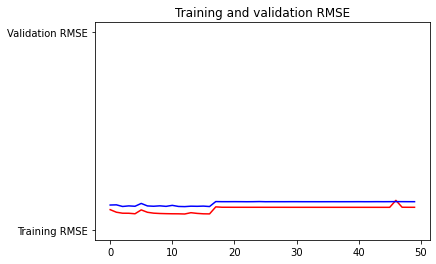

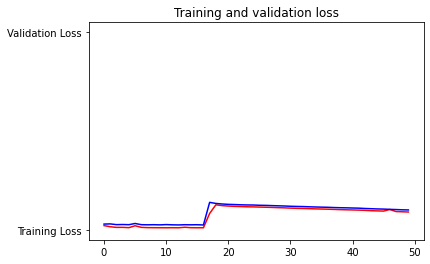

In [121]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
def plot_accuracy_and_loss(train_model, start_epoch, end_epoch):
    hist = train_model.history.history
    acc = hist['rms']
    val_acc = hist['val_rms']
    loss = hist['loss']
    val_loss = hist['val_loss']

    #epochs = range(len(acc)) # Get number of epochs
    epochs = range(start_epoch, end_epoch)
    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot(epochs, acc[start_epoch:end_epoch], 'r', "Training RMSE")
    plt.plot(epochs, val_acc[start_epoch:end_epoch], 'b', "Validation RMSE")
    plt.title('Training and validation RMSE')
    plt.figure()
    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot(epochs, loss[start_epoch:end_epoch], 'r', "Training Loss")
    plt.plot(epochs, val_loss[start_epoch:end_epoch], 'b', "Validation Loss")
    #plt.yticks(epochs)

    plt.title('Training and validation loss')
    
    # what is this y-axis
    # fix the y-axis later if needed
    
plot_accuracy_and_loss(autoencoder, 0, 50)

In [122]:
preds = scaler.inverse_transform(autoencoder.predict(bmw_data_ready))
preds = pd.DataFrame(preds)
preds.columns = bmw_data_ready.columns
preds.head()

,Unnamed: 0,ABGLEICH_LESEN_WERT,ABGLEICH_LESEN_WERT_CSIST_KF48,ABGLEICH_LESEN_WERT_CSSOLL_KF48,ABGLEICH_VERSTELLEN_WERT1,ABGLEICH_VERSTELLEN_WERT2,ABGLEICH_VERSTELLEN_WERT3,ABGLEICH_VERSTELLEN_WERT4,ANZAHL_CALID_CVN,ANZAHL_ZEICHEN_IMA_WERTE,...,ZIEL_YY_WERT,ZIF_PROGRAMMSTAND,ZIF_STATUS,year,hour,month,time_of_the_day_afternoon,time_of_the_day_evening,time_of_the_day_morning,time_of_the_day_night
0,5041.589355,99280.679688,0.999444,1.001548,-0.001634,0.000807,-0.005585,0.001636,3.999780,6.998744,...,6.184031,254.999176,255.001389,2019.821045,12.259352,14.772861,0.23831,0.260516,0.450411,0.049768
1,5041.589355,99280.765625,0.999444,1.001548,-0.001634,0.000807,-0.005585,0.001636,3.999780,6.998744,...,6.184031,254.999176,255.001389,2019.821045,12.259350,14.772863,0.23831,0.260516,0.450411,0.049768
2,5452.678711,1946.067505,0.963438,1.033111,-0.004164,0.015483,-0.015769,-0.000654,4.008801,7.019417,...,5.813333,254.988724,255.046890,2019.765869,13.297276,15.146250,0.19922,0.262451,0.429481,0.101068
3,5041.589355,99280.734375,0.999444,1.001548,-0.001634,0.000807,-0.005585,0.001636,3.999780,6.998744,...,6.184031,254.999176,255.001389,2019.821045,12.259352,14.772863,0.23831,0.260516,0.450411,0.049768
4,5041.590820,99280.421875,0.999444,1.001548,-0.001634,0.000807,-0.005585,0.001636,3.999780,6.998744,...,6.184031,254.999176,255.001389,2019.821045,12.259352,14.772864,0.23831,0.260516,0.450411,0.049768


In [88]:
bmw_data_ready.shape

(9920, 3092)

In [87]:
preds.shape

(9920, 3092)

In [85]:
bmw_data_ready.head()

,Unnamed: 0,ABGLEICH_LESEN_WERT,ABGLEICH_LESEN_WERT_CSIST_KF48,ABGLEICH_LESEN_WERT_CSSOLL_KF48,ABGLEICH_VERSTELLEN_WERT1,ABGLEICH_VERSTELLEN_WERT2,ABGLEICH_VERSTELLEN_WERT3,ABGLEICH_VERSTELLEN_WERT4,ANZAHL_CALID_CVN,ANZAHL_ZEICHEN_IMA_WERTE,...,ZIEL_YY_WERT,ZIF_PROGRAMMSTAND,ZIF_STATUS,year,hour,month,time_of_the_day_afternoon,time_of_the_day_evening,time_of_the_day_morning,time_of_the_day_night
0,0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,255.0,255.0,2020,11,6,0,0,1,0
1,1,2.00,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,22.0,255.0,255.0,2020,13,8,1,0,0,0
2,2,0.00,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,255.0,255.0,2020,11,5,0,0,1,0
3,3,1579.38,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,255.0,255.0,2020,8,11,0,0,1,0
4,4,0.00,1.0,1.0,0.0,0.0,0.0,0.0,4.0,7.0,...,0.0,255.0,255.0,2020,14,7,1,0,0,0


In [180]:
import tensorboard
%reload_ext tensorboard

In [183]:
#%tensorboard --logdir logs/imdb-example/ --host localhost #--port=7010
#%tensorboard --logdir data/tensorboard_ticket/vecs.tsv --host localhost --port=7080

%tensorboard --logdir logs/ --host localhost --port=1002

Reusing TensorBoard on port 1002 (pid 27632), started 0:01:14 ago. (Use '!kill 27632' to kill it.)